In [44]:
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from catboost.datasets import titanic

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

In [45]:
installs = pd.read_csv('TP 1er Cuatrimestre 2019/installs.csv', low_memory=False, parse_dates = ['created'], index_col=['created'])
installs = installs.sort_index()
installs.head()

,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
created,,,,,,,,,,,,,,,,,
2019-04-18 00:00:01.560,70,1891515180541284343,4432995619177048534,NaN,False,False,6287817205707153877,nan,nan,Apsalar-Postback,NaN,NaN,NaN,NaN,NaN,8409380583076227678,nan
2019-04-18 00:00:01.851,70,1891515180541284343,5904733559638204455,NaN,False,False,6287817205707153877,nan,nan,Apsalar-Postback,NaN,NaN,NaN,NaN,NaN,806493034070542041,nan
2019-04-18 00:00:05.152,65,1891515180541284343,896373747754111825,NaN,False,True,6287817205707153877,"308,305,860,557,778,688.00","5,274,185,305,862,703,104.00",http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 9; SM-G9650 Bu...,8c8af5e3-96e7-4a49-9f17-cafa7f300f2c,af_app_opened,False,NaN,6319394158544413414,"6,977,049,253,562,486,784.00"
2019-04-18 00:00:05.589,27,1494519392962156891,3399210824535017892,NaN,False,False,6287817205707153877,nan,"6,794,880,020,077,884,416.00",http-kit/2.0,trivago/216 CFNetwork/978.0.7 Darwin/18.5.0,NaN,NaN,True,NaN,4206683315615624585,"5,221,862,722,669,225,984.00"
2019-04-18 00:00:06.795,339,1494519392962156891,1541425881979513687,NaN,False,False,6287817205707153877,nan,"6,794,880,020,077,884,416.00",http-kit/2.0,TikTok/109005 CFNetwork/758.5.3 Darwin/15.6.0,NaN,NaN,True,NaN,8335834010411202437,"7,528,973,756,559,112,192.00"


In [46]:
marcas = list(installs['device_brand'].drop_duplicates())

def categorizarDeviceBrand(x):
    return marcas.index(x) if (x != -1) else x

installs['device_brand'] = installs['device_brand'].fillna(-1).apply(categorizarDeviceBrand)

In [47]:
device_model = list(installs['device_model'].drop_duplicates())

def categorizarDeviceModel(x):
    return device_model.index(x) if (x != -1) else x

installs['device_model'] = installs['device_model'].fillna(-1).apply(categorizarDeviceModel)

In [48]:
device_language = list(installs['device_language'].drop_duplicates())

def categorizarDeviceLanguage(x):
    return device_language.index(x) if (x != -1) else x

installs['device_language'] = installs['device_language'].fillna(-1).apply(categorizarDeviceLanguage)
installs.describe()

,application_id,ref_type,ref_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,"481,511.00","481,511.00","481,511.00","481,511.00","481,511.00","481,511.00","481,511.00","481,511.00"
mean,114.63,"1,823,409,079,062,006,528.00","4,608,269,779,645,287,936.00","6,287,817,205,671,257,088.00",6.91,346.91,"4,600,401,451,358,105,088.00",2.70
std,79.54,"149,664,427,496,563,488.00","2,664,214,826,414,426,624.00","35,896,357.27",43.23,742.45,"2,668,896,755,869,683,712.00",4.83
min,1.00,"1,494,519,392,962,156,800.00","40,621,409,780,134.00","6,287,817,205,707,153,408.00",-1.00,-1.00,"33,114,277,486,038.00",-1.00
25%,36.00,"1,891,515,180,541,284,352.00","2,302,034,075,654,886,656.00","6,287,817,205,707,153,408.00",-1.00,19.00,"2,285,331,530,900,604,416.00",1.00
50%,121.00,"1,891,515,180,541,284,352.00","4,605,906,598,492,731,392.00","6,287,817,205,707,153,408.00",1.00,108.00,"4,582,320,595,070,138,880.00",1.00
75%,155.00,"1,891,515,180,541,284,352.00","6,914,483,780,916,173,824.00","6,287,817,205,707,153,408.00",3.00,320.00,"6,906,963,104,056,018,944.00",4.00
max,360.00,"1,891,515,180,541,284,352.00","9,223,365,873,867,066,368.00","6,287,817,205,707,153,408.00","1,084.00","6,472.00","9,223,362,640,454,048,768.00",223.00


In [49]:
info1 = installs['2019-04-21':'2019-04-23'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info1['created'] = info1['created'] - pd.Timestamp('2019-04-21 00:00:00')
info1['created'] = info1['created'].transform(lambda x: x.total_seconds())
info1 = info1.reset_index()
info1 = info1.merge(installs['2019-04-18':'2019-04-20'].reset_index(),on="ref_hash", how="inner")
info1 = info1.rename(columns={'created_x':'label','created_y':'created'})

label1 = info1['label'].to_frame()
train1 = info1.drop('label', axis=1)

In [50]:
len(train1)

4947

In [74]:
info4 = installs['2019-04-24':'2019-04-26'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info4['created'] = info4['created'] - pd.Timestamp('2019-04-24 00:00:00')
info4['created'] = info4['created'].transform(lambda x: x.total_seconds())
info4 = info4.reset_index()
info4 = info4.merge(installs['2019-04-21':'2019-04-23'].reset_index(),on="ref_hash", how="right")
info4 = info4.rename(columns={'created_x':'label','created_y':'created'})

label4 = info4['label'].to_frame()
train4 = info4.drop('label', axis=1)


In [75]:
#train1.drop(['created','ref_type','click_hash','session_user_agent','user_agent','kind','wifi','trans_id','event_uuid'],axis =1, inplace = True )
train4.drop(['created','ref_type','click_hash','session_user_agent','user_agent','kind','wifi','trans_id','event_uuid'],axis =1, inplace = True )
#train1 = train1.dropna()
train4 = train4.dropna()

In [53]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 4946
Data columns (total 9 columns):
ref_hash              4947 non-null int64
application_id        4947 non-null int64
attributed            4947 non-null bool
implicit              4947 non-null bool
device_countrycode    4947 non-null int64
device_brand          4947 non-null float64
device_model          4947 non-null float64
ip_address            4947 non-null int64
device_language       4947 non-null float64
dtypes: bool(2), float64(3), int64(4)
memory usage: 318.8 KB


In [54]:
train1['device_brand'] = train1['device_brand'].astype(np.int16)
train1['device_model'] = train1['device_model'].astype(np.int16)
train1['device_language'] = train1['device_language'].astype(np.int16)

In [55]:
#Import the regression tree model
from sklearn.tree import DecisionTreeRegressor
#Parametrize the model
#We will use the mean squered error == varince as spliting criteria and set the minimum number
#of instances per leaf = 5
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 
#Fit the model
regression_model.fit(train1,label1)
#Predict unseen query instances
predicted = regression_model.predict(train1)
#Compute and plot the RMSE
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label1['label']-predicted[0])**2)/len(label1)))
RMSE

48509.696386188094

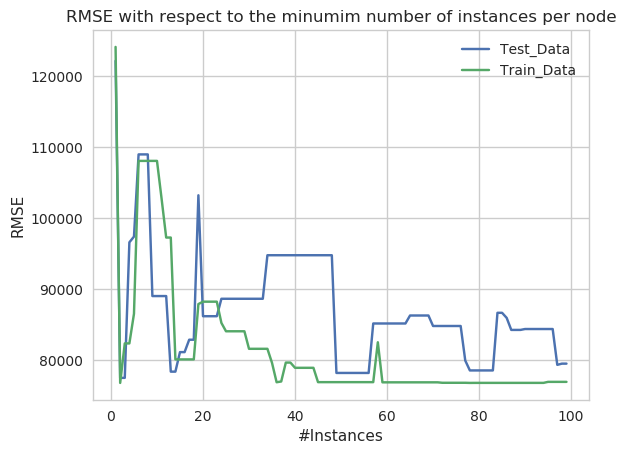

In [56]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,100):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(train1,label1)
    #Predict query instances
    predicted_train = regression_model.predict(train1)
    predicted_test = regression_model.predict(train4)
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((label1['label']-predicted_train[0])**2)/len(label1['label']))))
    RMSE_test.append(np.sqrt(np.sum(((label4['label']-predicted_test[0])**2)/len(label4['label']))))
   
ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

In [12]:
RMSE_train

[124102.39894086622,
 76742.2239434423,
 82310.99074623089,
 82310.99074623089,
 86490.04979946364,
 108038.04672205994,
 108038.04672205992,
 108038.04672205994,
 108038.04672205992,
 108038.04672205994,
 102712.64306325887,
 97233.61455019642,
 97233.6145501964,
 80054.89690364662,
 80054.89690364662,
 80054.89690364662,
 80054.89690364662,
 80054.89690364659,
 87857.13957343707,
 88194.44999261781,
 88194.44999261781,
 88194.44999261781,
 88194.44999261781,
 85200.4570158391,
 84021.79402202934,
 84021.79402202932,
 84021.79402202934,
 84021.79402202934,
 84021.79402202935,
 81550.67430211083,
 81550.67430211083,
 81550.67430211084,
 81550.67430211083,
 81550.67430211083,
 79569.9928932407,
 76838.17630162882,
 76944.12618804624,
 79609.80434849432,
 79609.80434849429,
 78872.10272088897,
 78872.10272088899,
 78872.10272088899,
 78872.10272088897,
 78872.10272088899,
 76851.46959084705,
 76851.46959084705,
 76851.46959084705,
 76851.46959084703,
 76851.46959084706,
 76851.4695908470

In [77]:
ultimo = installs['2019-04-21':'2019-04-23'].reset_index()

In [78]:
ultimo.drop(['created','ref_type','click_hash','session_user_agent','user_agent','kind','wifi','trans_id','event_uuid'],axis =1, inplace = True )
ultimo = ultimo.dropna()

In [79]:
predicted = regression_model.predict(ultimo)

In [80]:
predicted

array([100833.36246667, 136331.54630723, 121965.03401905, ...,
       100833.36246667, 139025.31716346, 124738.90733333])

In [81]:
preds = pd.DataFrame(predicted)
preds

,0
0,"100,833.36"
1,"136,331.55"
2,"121,965.03"
3,"100,833.36"
4,"97,917.07"
5,"96,837.76"
6,"100,833.36"
7,"115,376.13"
8,"121,965.03"
9,"126,116.45"


In [82]:
ultimo["pred"] = preds
ultimo.head()

,application_id,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,ip_address,device_language,pred
0,21,418235700983182621,False,False,6287817205707153877,-1.00,291.00,8094978270300685554,4.00,"100,833.36"
1,65,2460702517976523109,False,False,6287817205707153877,18.00,"1,472.00",5723411869744768368,1.00,"136,331.55"
2,128,1301348383663544925,False,False,6287817205707153877,1.00,195.00,2643628468832862417,1.00,"121,965.03"
3,121,8658033545182476382,False,False,6287817205707153877,1.00,263.00,4310530073654857325,1.00,"100,833.36"
4,36,7232419269532998327,False,False,6287817205707153877,2.00,140.00,8795139380757720123,1.00,"97,917.07"


In [83]:
ultimo['sc'] = ultimo['ref_hash'].transform(lambda x: str(x)+'_sc')
ultimo['st'] = ultimo['ref_hash'].transform(lambda x: str(x)+'_st')
ultimo.head()

,application_id,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,ip_address,device_language,pred,sc,st
0,21,418235700983182621,False,False,6287817205707153877,-1.00,291.00,8094978270300685554,4.00,"100,833.36",418235700983182621_sc,418235700983182621_st
1,65,2460702517976523109,False,False,6287817205707153877,18.00,"1,472.00",5723411869744768368,1.00,"136,331.55",2460702517976523109_sc,2460702517976523109_st
2,128,1301348383663544925,False,False,6287817205707153877,1.00,195.00,2643628468832862417,1.00,"121,965.03",1301348383663544925_sc,1301348383663544925_st
3,121,8658033545182476382,False,False,6287817205707153877,1.00,263.00,4310530073654857325,1.00,"100,833.36",8658033545182476382_sc,8658033545182476382_st
4,36,7232419269532998327,False,False,6287817205707153877,2.00,140.00,8795139380757720123,1.00,"97,917.07",7232419269532998327_sc,7232419269532998327_st


In [84]:
target = pd.read_csv('TP 1er Cuatrimestre 2019/target_competencia_ids.csv', low_memory=False)
target.head()

,ref_hash,obj
0,1000169251625791246_sc,0
1,1000169251625791246_st,0
2,1000395625957344683_sc,0
3,1000395625957344683_st,0
4,1003027494996471685_sc,0


In [96]:
mergeado1 = target.merge(ultimo[['sc','pred']],left_on = 'ref_hash',right_on='sc',how='left')
mergeado1 = mergeado1[['ref_hash','pred']]
mergeado1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8468 entries, 0 to 8467
Data columns (total 2 columns):
ref_hash    8468 non-null object
pred        1780 non-null float64
dtypes: float64(1), object(1)
memory usage: 198.5+ KB


In [97]:
mergeado1.head()

,ref_hash,pred
0,1000169251625791246_sc,"121,965.03"
1,1000169251625791246_st,nan
2,1000395625957344683_sc,nan
3,1000395625957344683_st,nan
4,1003027494996471685_sc,"97,540.51"
